<h1>前処理</h1>

In [1]:
import pandas as pd

# boxing_dataファイルを読み込んで、データフレームに変換
df = pd.read_csv('boxing_data.csv', encoding="shift-jis")
df.tail(3)

,名前,年齢,身長,リーチ,スタイル,階級
176,ジョセフ・パーカー,31,193,193,オーソドックス,ヘビー級
177,フィリプ・フルゴビッチ,30,198,208,オーソドックス,ヘビー級
178,フランク・サンチェス,30,193,198,オーソドックス,ヘビー級


In [2]:
# uniqueメソッドで正解データを確認
df['階級'].unique()

array(['ミニマム級', 'ライトフライ級', 'フライ級', 'スーパーフライ級', 'バンタム級', 'スーパーバンタム級',
       'フェザー級', 'スーパーフェザー級', 'ライト級', 'スーパーライト級', 'ウェルター級', 'スーパーウェルター級',
       'ミドル級', 'スーパーミドル級', 'ライトヘビー級', 'クルーザー級', 'ヘビー級'], dtype=object)

In [3]:
# value_counts()メソッドでデータの出現回数をカウント
df['階級'].value_counts()

ライト級          11
ライトフライ級       11
クルーザー級        11
スーパーミドル級      11
スーパーウェルター級    11
スーパーライト級      11
ヘビー級          11
バンタム級         11
スーパーフライ級      11
スーパーフェザー級     10
フェザー級         10
スーパーバンタム級     10
ウェルター級        10
ミドル級          10
ライトヘビー級       10
フライ級          10
ミニマム級         10
Name: 階級, dtype: int64

In [4]:
# 列単位で欠損値が存在するか調べる
df.isnull().any(axis = 0)

名前      False
年齢      False
身長      False
リーチ     False
スタイル    False
階級      False
dtype: bool

In [5]:
# 列ごとの欠損値の個数を集計
df.isnull().sum()

名前      0
年齢      0
身長      0
リーチ     0
スタイル    0
階級      0
dtype: int64

<AxesSubplot:xlabel='身長', ylabel='リーチ'>

C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12481 (\N{KATAKANA LETTER TI}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36523 (\N{CJK UNIFIED

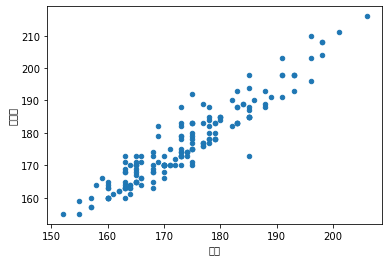

In [6]:
%matplotlib inline

# 身長とリーチの散布図の作成
df.plot(kind = 'scatter', x = '身長', y = 'リーチ')

In [7]:
# 特徴量と正解データを変数に代入
xcol = ['年齢', '身長', 'リーチ']

x = df[xcol]
t = df['階級']

<h1>学習</h1>

In [8]:
# サポートベクターマシンをインポート
from sklearn import svm

# モデルの作成
model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='scale', 
    coef0=0.0, shrinking=True, probability=False, tol=1.0, 
    cache_size=200, class_weight=None, verbose=False, max_iter=- 1, 
    decision_function_shape='ovr', break_ties=False, random_state=None)

# モデルの学習
model.fit(x, t)

# テストデータによる予測
test_data = [[27, 172, 173]]
test_label = model.predict(test_data)

# 予測結果の表示
print(test_label)

['ライト級']


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [9]:
# モデルの保存
import pickle
with open('boxing.pkl', 'wb') as f:
    pickle.dump(model, f)

In [10]:
# 保存したモデルの動作確認

import pickle

# 保存したモデルをロードする
with open('boxing.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# ユーザ入力データによる予測
input_data = [[29, 166, 172]]
box_label = loaded_model.predict(input_data)

# 予測結果の表示
print(box_label)

['バンタム級']


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
